In [1]:
from geoband.API import *
import pandas as pd
import folium
import json
import geopandas as gpd
from geojson import Feature, FeatureCollection, Point, dump
import matplotlib.pyplot as plt
import pydeck as pdk
import shapely
import jenkspy
import numpy as np
plt.rc("font", family = "Malgun Gothic")
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') 

In [56]:
parking=GetCompasData('SBJ_2012_001', '1', '1.오산시_주정차단속(2018~2020).csv')
grid_accident=GetCompasData('SBJ_2012_001', '2', '2.오산시_어린이교통사고_격자.geojson')
grid_car_enrollment=GetCompasData('SBJ_2012_001', '3', '3.오산시_차량등록현황_격자.geojson')
pop=GetCompasData('SBJ_2012_001', '4', '4.오산시_연령별_거주인구격자(총인구).geojson')
junior_pop=GetCompasData('SBJ_2012_001', '5', '5.오산시_연령별_거주인구격자(유소년).geojson')
product_pop=GetCompasData('SBJ_2012_001', '6', '6.오산시_연령별_거주인구격자(생산가능인구).geojson')
senior_pop=GetCompasData('SBJ_2012_001', '7', '7.오산시_연령별_거주인구격자(고령).geojson')
floating_pop=GetCompasData('SBJ_2012_001', '8', '8.오산시_유동인구(2019).csv')
protection_area=GetCompasData('SBJ_2012_001', '9', '9.오산시_어린이보호구역.csv')
school=GetCompasData('SBJ_2012_001', '10', '10.오산시_학교위치정보.csv')
elementary_district=GetCompasData('SBJ_2012_001', '11', '11.오산시_초등학교_통학구.geojson')
middle_district=GetCompasData('SBJ_2012_001', '12', '12.오산시_중학교_학군.geojson')
kinder=GetCompasData('SBJ_2012_001', '13', '13.오산시_어린이집_유치원현황.csv')
weather=GetCompasData('SBJ_2012_001', '14', '14.오산시_기상데이터(2010~2019).csv')
traffic_cctv=GetCompasData('SBJ_2012_001', '15', '15.오산시_무인교통단속카메라.csv')
road_sign=GetCompasData('SBJ_2012_001', '16', '16.오산시_도로안전표지표준데이터.csv')
crosswalk=GetCompasData('SBJ_2012_001', '17', '17.오산시_횡단보도.geojson')
speed_bump=GetCompasData('SBJ_2012_001', '18', '18.오산시_과속방지턱표준데이터.csv')
traffic_sign=GetCompasData('SBJ_2012_001', '19', '19.오산시_신호등.geojson')
cctv=GetCompasData('SBJ_2012_001', '20', '20.오산시_CCTV설치현황.csv')
sidewalk=GetCompasData('SBJ_2012_001', '21', '21.오산시_인도.geojson')
bus_stop=GetCompasData('SBJ_2012_001', '22', '22.오산시_버스정류장.csv')
road=GetCompasData('SBJ_2012_001', '23', '23.오산시_상세도로망_LV6.geojson')
traffic=GetCompasData('SBJ_2012_001', '24', '24.평일_전일,시간대별_오산시_추정교통량_Level6.csv')
traffic_frequency=GetCompasData('SBJ_2012_001', '25', '25.평일_전일_오산시_혼잡빈도강도_Level6.csv')
traffic_time=GetCompasData('SBJ_2012_001', '26', '26.평일_전일_오산시_혼잡시간강도_Level6.csv')
building=GetCompasData('SBJ_2012_001', '27', '27.오산시_도로명주소_건물.geojson')
grid_building=GetCompasData('SBJ_2012_001', '28', '28.오산시_건물연면적_격자.geojson')
sports=GetCompasData('SBJ_2012_001', '29', '29.오산시_체육시설현황.csv')
academy=GetCompasData('SBJ_2012_001', '30', '30.오산시_학원_및_교습소_현황.csv')
le_sig=GetCompasData('SBJ_2012_001', '31', '31.오산시_법정경계(시군구).geojson')
ad_emd=GetCompasData('SBJ_2012_001', '32', '32.오산시_행정경계(읍면동).geojson')
le_emd=GetCompasData('SBJ_2012_001', '33', '33.오산시_법정경계(읍면동).geojson')
cadastral_map=GetCompasData('SBJ_2012_001', '34', '34.오산시_지적도.geojson')

In [2]:
parking=pd.read_csv('1.오산시_주정차단속(2018~2020).csv')
grid_accident=gpd.read_file('2.오산시_어린이교통사고_격자.geojson')
grid_car_enrollment=gpd.read_file('3.오산시_차량등록현황_격자.geojson')
pop=gpd.read_file('4.오산시_연령별_거주인구격자(총인구).geojson')
junior_pop=gpd.read_file('5.오산시_연령별_거주인구격자(유소년).geojson')
product_pop=gpd.read_file('6.오산시_연령별_거주인구격자(생산가능인구).geojson')
senior_pop=gpd.read_file('7.오산시_연령별_거주인구격자(고령).geojson')
floating_pop=pd.read_csv('8.오산시_유동인구(2019).csv')
protection_area=pd.read_csv('9.오산시_어린이보호구역.csv')
school=pd.read_csv('10.오산시_학교위치정보.csv')
elementary_district=gpd.read_file('11.오산시_초등학교_통학구.geojson')
middle_district=gpd.read_file('12.오산시_중학교_학군.geojson')
kinder=pd.read_csv('13.오산시_어린이집_유치원현황.csv')
weather=pd.read_csv('14.오산시_기상데이터(2010~2019).csv')
traffic_cctv=pd.read_csv('15.오산시_무인교통단속카메라.csv')
road_sign=pd.read_csv('16.오산시_도로안전표지표준데이터.csv')
crosswalk=gpd.read_file('17.오산시_횡단보도.geojson')
speed_bump=pd.read_csv('18.오산시_과속방지턱표준데이터.csv')
traffic_sign=gpd.read_file('19.오산시_신호등.geojson')
cctv=pd.read_csv('20.오산시_CCTV설치현황.csv')
sidewalk=gpd.read_file('21.오산시_인도.geojson')
bus_stop=pd.read_csv('22.오산시_버스정류장.csv')
road=gpd.read_file('23.오산시_상세도로망_LV6.geojson')
traffic=pd.read_csv('24.평일_전일,시간대별_오산시_추정교통량_Level6.csv')
traffic_frequency=pd.read_csv('25.평일_전일_오산시_혼잡빈도강도_Level6.csv')
traffic_time=pd.read_csv('26.평일_전일_오산시_혼잡시간강도_Level6.csv')
building=gpd.read_file('27.오산시_도로명주소_건물.geojson')
grid_building=gpd.read_file('28.오산시_건물연면적_격자.geojson')
sports=pd.read_csv('29.오산시_체육시설현황.csv')
academy=pd.read_csv('30.오산시_학원_및_교습소_현황.csv')
le_sig=gpd.read_file('31.오산시_법정경계(시군구).geojson')
ad_emd=gpd.read_file('32.오산시_행정경계(읍면동).geojson')
le_emd=gpd.read_file('33.오산시_법정경계(읍면동).geojson')

In [3]:
#지도 그리는 함수 지정
def drawing_Choro(df, osan_grid, title, legend):
    center=[37.1498, 127.0772]
    # 맵이 center 에 위치하고, zoom 레벨은 16로 시작하는 맵 m을 만듭니다.
    m1 = folium.Map(
        location=center,
        zoom_start=13,
        tiles='http://api.vworld.kr/req/wmts/1.0.0/26BFD173-330E-3D54-9C39-895DDD8F23B3/Base/{z}/{y}/{x}.png',
        attr='My Data Attribution'
    )

    # Choropleth 레이어를 만들고, 맵 m에 추가합니다.
    folium.Choropleth(
        geo_data=osan_grid,
        data=df,
        columns=('gid', 'time'),
        key_on='feature.properties.gid',
        legend_name = legend,
        fill_color='PuBuGn',
        line_opacity = 0.2,
    ).add_to(m1)

    # 맵 m을 출력합니다.
    m1.save("{0}.html".format(title))

In [4]:
#지도에 맵핑할 격자들 만들기
osan_grid=pop.drop('val',axis=1)
osan_grid

,gid,geometry
0,다사551085,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."
...,...,...
4505,다사646052,"MULTIPOLYGON (((127.10138 37.14484, 127.10138 ..."
4506,다사646053,"MULTIPOLYGON (((127.10138 37.14575, 127.10137 ..."
4507,다사647050,"MULTIPOLYGON (((127.10252 37.14305, 127.10251 ..."
4508,다사647051,"MULTIPOLYGON (((127.10251 37.14395, 127.10251 ..."


# pydeck 쓰기 위한 데이터 처리 함수 지정 

In [5]:
#주정차 단속
parking.columns=['date','parking_location','ad_area','school_zone',
                 'parking_lon','parking_lat','parking_type']
#스쿨존에 해당하면 1 아니면 0
parking.loc[parking['school_zone']=='N','school_zone']=0
parking.loc[parking['school_zone']=='Y','school_zone']=1
parking

,date,parking_location,ad_area,school_zone,parking_lon,parking_lat,parking_type
0,20181101,금암동 여계산로 부근,경기도 오산시 세교동,0,127.043462,37.170237,이동형CCTV단속
1,20181101,세교동 세마역로19번길,경기도 오산시 세교동,0,127.044770,37.181695,이동형CCTV단속
2,20181101,세교동 수목원로 부근,경기도 오산시 양산동,0,127.042200,37.186357,이동형CCTV단속
3,20181101,오산동 오산로272번길 부,경기도 오산시 원동,0,127.071732,37.150557,이동형CCTV단속
4,20181101,오산동 성호대로93번길,경기도 오산시 부산동,0,127.071757,37.150457,이동형CCTV단속
...,...,...,...,...,...,...,...
61696,20201111,GS25궐동대호점 맞은편,경기도 오산시 청학동,0,127.053064,37.158140,고정형CCTV단속
61697,20201111,물향기지하도,경기도 오산시 원동,0,127.066157,37.171143,고정형CCTV단속
61698,20201111,운암2단지 근린공원삼거,경기도 오산시 청호동,0,127.077283,37.158126,고정형CCTV단속
61699,20201111,궐동 양평해장국 사거리,경기도 오산시 궐동,0,127.056665,37.155827,고정형CCTV단속


In [6]:
#parking null값에 해당하는 곳은 유탑유블레스 관련한 cctv들임 어떻게 처리할까-SY
parking[parking['parking_lon'].isnull()]

##### 창균 (12.22) #####
# 오산시 유탑유블레스 남측 좌표 
parking["parking_lon"].fillna(127.072291, inplace = True)
parking["parking_lat"].fillna(37.141363, inplace = True)
parking

,date,parking_location,ad_area,school_zone,parking_lon,parking_lat,parking_type
0,20181101,금암동 여계산로 부근,경기도 오산시 세교동,0,127.043462,37.170237,이동형CCTV단속
1,20181101,세교동 세마역로19번길,경기도 오산시 세교동,0,127.044770,37.181695,이동형CCTV단속
2,20181101,세교동 수목원로 부근,경기도 오산시 양산동,0,127.042200,37.186357,이동형CCTV단속
3,20181101,오산동 오산로272번길 부,경기도 오산시 원동,0,127.071732,37.150557,이동형CCTV단속
4,20181101,오산동 성호대로93번길,경기도 오산시 부산동,0,127.071757,37.150457,이동형CCTV단속
...,...,...,...,...,...,...,...
61696,20201111,GS25궐동대호점 맞은편,경기도 오산시 청학동,0,127.053064,37.158140,고정형CCTV단속
61697,20201111,물향기지하도,경기도 오산시 원동,0,127.066157,37.171143,고정형CCTV단속
61698,20201111,운암2단지 근린공원삼거,경기도 오산시 청호동,0,127.077283,37.158126,고정형CCTV단속
61699,20201111,궐동 양평해장국 사거리,경기도 오산시 궐동,0,127.056665,37.155827,고정형CCTV단속


In [7]:
#나중에 비율 구할때 써야됨
#val값에 null은 측정이 안된 곳이기에 0으로 처리해줌-SY
pop=pop.rename(columns={'val':'pop_val'})
pop=pop.fillna(0)
junior_pop=junior_pop.rename(columns={'val':'junior_val'})
junior_pop=junior_pop.fillna(0)
senior_pop=senior_pop.rename(columns={'val':'senior_val'})
senior_pop=senior_pop.fillna(0)
product_pop=product_pop.rename(columns={'val':'product_val'})
product_pop=product_pop.fillna(0)

In [8]:
# 정민 수정사항(12/21)
# 오산시 격자별 유소년 인구수/총 인구수 데이터 전처리

junior_ratio_pop = junior_pop.merge(pop, on ='gid')
junior_ratio_pop = junior_ratio_pop.drop(['geometry_x'], axis = 1)
junior_ratio_pop.columns = ['gid', 'junior_val', 'pop_val', 'geometry']
junior_ratio_pop['junior_ratio'] = junior_ratio_pop['junior_val']/junior_ratio_pop['pop_val'] * 100

junior_ratio_pop['junior_ratio'].value_counts()
junior_ratio_pop=junior_ratio_pop.fillna(0)
junior_ratio_pop

,gid,junior_val,pop_val,geometry,junior_ratio
0,다사551085,0.0,0.0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ...",0.0
1,다사551086,0.0,0.0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ...",0.0
2,다사551087,0.0,0.0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ...",0.0
3,다사551088,0.0,0.0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ...",0.0
4,다사552085,0.0,0.0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ...",0.0
...,...,...,...,...,...
4505,다사646052,0.0,0.0,"MULTIPOLYGON (((127.10138 37.14484, 127.10138 ...",0.0
4506,다사646053,0.0,0.0,"MULTIPOLYGON (((127.10138 37.14575, 127.10137 ...",0.0
4507,다사647050,0.0,0.0,"MULTIPOLYGON (((127.10252 37.14305, 127.10251 ...",0.0
4508,다사647051,0.0,0.0,"MULTIPOLYGON (((127.10251 37.14395, 127.10251 ...",0.0


<AxesSubplot:xlabel='gid', ylabel='junior population ratio to total population'>

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


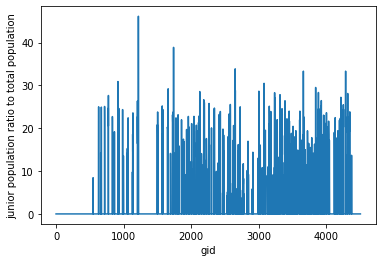

In [9]:
# 주니어 인구비율 분포확인
%matplotlib inline
junior_ratio_pop["junior_ratio"].plot(xlabel = "gid", ylabel = "junior population ratio to total population")

In [10]:
#합치는 코드 있어서 한번만 돌려야됨
#유동인구
col_list=list(floating_pop)
col_list_all=col_list[3:]
col_list_14_20=col_list[17:23]
#모든 시간대 유동인구
floating_pop['all']=floating_pop[col_list_all].sum(axis=1)
#사고가 가장 많이 일어나는 14~20
floating_pop['14_20']=floating_pop[col_list_14_20].sum(axis=1)
floating_pop=floating_pop.rename(columns={'STD_YM':'YM','lon':'floating_lon','lat':'floating_lat'})
floating_pop

,YM,floating_lon,floating_lat,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23,all,14_20
0,201901,126.995145,37.176703,0.08,0.05,0.04,0.04,0.08,0.27,0.80,...,0.95,0.91,0.70,0.43,0.34,0.22,0.14,0.10,11.70,4.44
1,201901,126.995142,37.177153,0.06,0.04,0.03,0.03,0.06,0.19,0.56,...,0.69,0.66,0.51,0.33,0.26,0.17,0.11,0.08,8.88,3.31
2,201901,126.995714,37.175804,0.00,0.00,0.00,0.00,0.00,0.01,0.03,...,0.05,0.05,0.03,0.02,0.02,0.01,0.01,0.00,0.58,0.23
3,201901,126.995711,37.176254,0.05,0.03,0.02,0.03,0.05,0.19,0.56,...,0.65,0.63,0.48,0.29,0.23,0.15,0.10,0.07,8.08,3.06
4,201901,126.995708,37.176705,0.02,0.01,0.01,0.01,0.02,0.07,0.18,...,0.23,0.22,0.17,0.11,0.09,0.06,0.04,0.03,3.08,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125158,201912,127.097213,37.154107,0.09,0.07,0.05,0.04,0.04,0.04,0.05,...,0.12,0.12,0.14,0.14,0.14,0.14,0.12,0.11,2.37,0.75
125159,201912,127.097819,37.145997,0.23,0.18,0.12,0.09,0.09,0.11,0.14,...,0.30,0.34,0.34,0.35,0.35,0.34,0.32,0.28,5.86,1.89
125160,201912,127.097793,37.150955,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.78,0.24
125161,201912,127.098354,37.151407,0.02,0.02,0.02,0.00,0.00,0.00,0.02,...,0.02,0.02,0.04,0.04,0.04,0.04,0.02,0.02,0.50,0.16


In [11]:
#어린이 보호구역
protection_area.columns=['protection_type','protection_name','protection_cctv',
                         'protection_cctv_count','width','protection_lon','protection_lat']
#cctv 있으면 1 없으면 0
protection_area.loc[protection_area['protection_cctv']=='N','protection_cctv']=0
protection_area.loc[protection_area['protection_cctv']=='Y','protection_cctv']=1
protection_area

,protection_type,protection_name,protection_cctv,protection_cctv_count,width,protection_lon,protection_lat
0,특수학교,성심학교,0,0,25,127.017521,37.176762
1,초등학교,가수초등학교,1,1,12,127.047957,37.148103
2,초등학교,광성초등학교,1,2,12,127.039709,37.184197
3,초등학교,대호초등학교,1,3,12,127.057889,37.159106
4,초등학교,매홀초등학교,1,2,6,127.063282,37.162749
...,...,...,...,...,...,...,...
86,어린이집,시립세마어린이집,1,1,12,127.044916,37.184608
87,어린이집,미래숲어린이집,1,1,6,127.044384,37.145326
88,어린이집,시립은여울어린이집,0,0,20,127.066860,37.170952
89,어린이집,설리반어린이집,0,0,5,127.061041,37.164127


In [12]:
#학교 위치정보
a=school.loc[school['학교구분'].isin(['고등학교','중학교'])].index
school=school.drop(a)
school.columns=['school_type','school_name','school_lon','school_lat']
school

,school_type,school_name,school_lon,school_lat
0,초등학교,원동초등학교,127.069699,37.135168
1,초등학교,운산초등학교,127.077414,37.152500
2,초등학교,화성초등학교,127.068858,37.164615
12,초등학교,가수초등학교,127.047749,37.147919
13,초등학교,다온초등학교,127.090752,37.151698
14,초등학교,매홀초등학교,127.063587,37.162365
15,초등학교,문시초등학교,127.045862,37.174141
16,초등학교,성산초등학교,127.066424,37.149695
17,초등학교,세미초등학교,127.064666,37.173997
18,초등학교,양산초등학교,127.032111,37.196887


In [13]:
# 초등학교 통학구
#type이 0이면 단독 통학구 1이면 다중 통학구?
elementary_district.columns=['objectid','district_id','ed_name','ed_type','ed_geometry']
elementary_district.head()


,objectid,district_id,ed_name,ed_type,ed_geometry
0,2648,Z000102542,오산고현초통학구역,0,"MULTIPOLYGON (((127.08560 37.13923, 127.08593 ..."
1,2774,Z000102531,수청초통학구역,0,"MULTIPOLYGON (((127.06076 37.17523, 127.06074 ..."
2,3259,Z000150216,대호초성산초공동통학구역,1,"MULTIPOLYGON (((127.03921 37.16869, 127.03953 ..."
3,3300,Z000102507,문시초통학구역,0,"MULTIPOLYGON (((127.05068 37.17408, 127.05084 ..."
4,3299,Z000102567,필봉초통학구역,0,"MULTIPOLYGON (((127.05151 37.18063, 127.05274 ..."


In [14]:
# 어린이집 유치원현황
kinder=kinder.drop('시설타입',axis=1)
kinder.columns=['kinder_type','kinder_name','kinder_lon','kinder_lat']
kinder

,kinder_type,kinder_name,kinder_lon,kinder_lat
0,어린이집,해오름어린이집,127.084336,37.132383
1,어린이집,햇살가득어린이집,127.041817,37.182164
2,어린이집,행복한아이들어린이집,127.079494,37.152891
3,어린이집,휴튼사과나무어린이집,127.049638,37.177976
4,어린이집,(주)아모레퍼시픽 오산어린이집,127.040252,37.165311
...,...,...,...,...
302,유치원,매홀초등학교병설유치원,127.063587,37.162365
303,유치원,문시초등학교병설유치원,127.045862,37.174141
304,유치원,세교유치원,127.044332,37.177051
305,유치원,수청초등학교병설유치원,127.055667,37.170668


In [15]:
#무인교통 단속 카메라
traffic_cctv=traffic_cctv.drop(['도로노선방향','단속구분'],axis=1)
traffic_cctv.columns=['tc_road_name','tc_location_name','tc_lon','tc_lat']
traffic_cctv

,tc_road_name,tc_location_name,tc_lon,tc_lat
0,궐리사로,궐동-법원앞(법원사거리),127.059357,37.159313
1,역광장로,원동-오산역광장,127.067796,37.145409
2,궐리사로,궐동-제일하이빌,127.062386,37.159198
3,궐리사로,궐리사 주차장 앞,127.061920,37.158559
4,운암로,부산동-운천초교 입구,127.077991,37.156216
...,...,...,...,...
107,경기동로186번길,시티자이2차 아파트 앞,127.091941,37.154632
108,역광장로,오원사거리,127.068303,37.142519
109,청학로,차량등록사업소,127.064287,37.158197
110,수목원로468번길,세교9단지 후문 상가도로,127.050714,37.175949


In [16]:
#도로안전표지 표준데이터
road_sign.columns=['road_sign_num','road_sign_type','road_sign_lon','road_sign_lat']
road_sign

,road_sign_num,road_sign_type,road_sign_lon,road_sign_lat
0,ER-400[봉담동탄고속도로]-상-60,2방향예고표지,127.069227,37.182663
1,NR-1[경기대로]-하-1982,시/군계표지,127.040826,37.197859
2,UR(오산시)-16[남부대로]-상-5,3방향도로명예고표지,127.070216,37.135929
3,UR(오산시)-16[남부대로]-하-3,3방향표지,127.064316,37.135531
4,UR(오산시)-16[남부대로]-하-4,3방향예고표지,127.051717,37.134248
...,...,...,...,...
826,UR(오산시)-[부원로]-하-2,2방향표지,127.084624,37.144540
827,RR-310[가장로]-상-170,2방향예고표지,127.035840,37.160577
828,RR-82[성호대로]-하-51,사설표지(허가),127.064309,37.149266
829,RR-82[성호대로]-하-52,하천표지,127.062244,37.149482


In [17]:
#횡단보도
## 창균 추가 수정 (12.22)
crosswalk.columns=['crosswalk_objectid','crosswalk_geometry']
crosswalk

,crosswalk_objectid,crosswalk_geometry
0,2,"MULTIPOLYGON (((127.06170 37.15704, 127.06178 ..."
1,3,"MULTIPOLYGON (((127.03174 37.19499, 127.03176 ..."
2,4,"MULTIPOLYGON (((127.05525 37.15645, 127.05533 ..."
3,5,"MULTIPOLYGON (((127.04935 37.13434, 127.04939 ..."
4,6,"MULTIPOLYGON (((127.06216 37.14973, 127.06228 ..."
...,...,...
1200,1292,"MULTIPOLYGON (((127.07846 37.13971, 127.07842 ..."
1201,1294,"MULTIPOLYGON (((127.08997 37.15087, 127.08994 ..."
1202,1295,"MULTIPOLYGON (((127.05778 37.15212, 127.05792 ..."
1203,1297,"MULTIPOLYGON (((127.04281 37.18184, 127.04291 ..."


In [18]:
#과속방지턷표준데이터
speed_bump.columns=['bump_road_name','bump_location_name','bump_height','bump_width',
                   'bump_length','bump_sep','bump_continue','bump_lon','bump_lat']
#과속방지턱 보차분리여부,연속형 여부 0,1로 변환
speed_bump.loc[speed_bump['bump_sep']=='N','bump_sep']=0
speed_bump.loc[speed_bump['bump_sep']=='Y','bump_sep']=1
speed_bump.loc[speed_bump['bump_continue']=='N','bump_continue']=0
speed_bump.loc[speed_bump['bump_continue']=='Y','bump_continue']=1
speed_bump


,bump_road_name,bump_location_name,bump_height,bump_width,bump_length,bump_sep,bump_continue,bump_lon,bump_lat
0,오산로,소망빌 앞,10,3.6,5.4,0,1,127.068954,37.130852
1,동부대로,태영철강재공장 앞,10,3.6,5.0,0,1,127.076305,37.137946
2,밀머리로,메디마트 앞,0,3.6,5.4,1,1,127.075093,37.141466
3,오산로,다인하우스 앞,10,3.6,10.0,1,1,127.071169,37.143833
4,운천로,운천고등학교 앞,10,3.6,6.0,1,1,127.080466,37.155872
5,성호대로,오산우체국 앞,10,3.6,5.0,1,1,127.070781,37.149169
6,경기대로,오산동 어린이공원 앞,10,3.6,6.0,0,1,127.072608,37.151294
7,청학로,오산중학교 앞,10,3.6,6.5,1,1,127.061185,37.155124
8,청학로,세산다세대 부근,10,3.6,4.3,1,0,127.062582,37.152656
9,청학로,정석빌딩 앞,10,3.6,4.4,1,0,127.062101,37.150484


In [19]:
#신호등
## 창균 추가 수정 (12.22)
traffic_sign.columns=['traffic_sign_objectid','traffic_sign_geometry']
traffic_sign

,traffic_sign_objectid,traffic_sign_geometry
0,1,POINT (127.07160 37.14407)
1,2,POINT (127.08149 37.12849)
2,3,POINT (127.03978 37.16155)
3,4,POINT (127.03999 37.16168)
4,5,POINT (127.07838 37.14296)
...,...,...
1493,1494,POINT (127.07888 37.15909)
1494,1495,POINT (127.07832 37.15993)
1495,1496,POINT (127.07850 37.15977)
1496,1497,POINT (127.07820 37.15971)


In [20]:
#cctv
# cctv_type A: 방범 B:도시공원 C:어린이보호 D:차량방범
cctv.columns=['cctv_type','cctv_road_name','cctv_lat','cctv_lon']
#cctv_lat,lon에서 중복적으로 결측값이 나와서 drop, road_name도 null값 nan으로 처리-SY
cctv=cctv.drop([500,567],axis=0)
cctv=cctv.fillna('NaN')
cctv

,cctv_type,cctv_road_name,cctv_lat,cctv_lon
0,A,성호대로55번길 31-2,37.151836,127.067541
1,A,성호대로93번길 45,37.152812,127.071702
2,C,성호대로93번길 26,37.151167,127.071677
3,A,운천로165번길 52-1,37.157164,127.075991
4,A,운천로165번길 5,37.156461,127.077273
...,...,...,...,...
562,E,성호초,37.149096,127.070001
563,E,대원초,37.131781,127.072728
564,E,원일초,37.139445,127.071237
565,E,운천초,37.156239,127.078048


In [21]:
#인도
sidewalk=sidewalk.drop('QUAL',axis=1)
sidewalk.columns=['sidewalk_id','sidewalk_bicycle',
                  'sidewalk_type','sidewalk_geometry']
#자전거 도로유무 BYC001이 있고 나머지가 없음
sidewalk.loc[sidewalk['sidewalk_bicycle']=='BYC001','sidewalk_bicycle']=1
sidewalk.loc[sidewalk['sidewalk_bicycle']=='BYC002','sidewalk_bicycle']=0
sidewalk

,sidewalk_id,sidewalk_bicycle,sidewalk_type,sidewalk_geometry
0,TRN0400000002N7T0,1,SWK001,"MULTILINESTRING ((127.05144 37.14183, 127.0514..."
1,TRN0400000002N79G,1,SWK001,"MULTILINESTRING ((127.04907 37.14108, 127.0490..."
2,TRN0400000002N7LS,1,SWK001,"MULTILINESTRING ((127.05210 37.14163, 127.0521..."
3,TRN0400000002NAR1,1,SWK001,"MULTILINESTRING ((127.07471 37.14870, 127.0747..."
4,TRN0400000003E7DC,1,SWK001,"MULTILINESTRING ((127.07466 37.14988, 127.0746..."
...,...,...,...,...
1335,TRN050000000048WK,1,SWK002,"MULTILINESTRING ((127.04644 37.17758, 127.0463..."
1336,TRN050000000048XL,1,SWK002,"MULTILINESTRING ((127.02588 37.17715, 127.0259..."
1337,TRN050000000048YM,1,SWK002,"MULTILINESTRING ((127.02783 37.17885, 127.0278..."
1338,TRN050000000048ZN,1,SWK002,"MULTILINESTRING ((127.04136 37.19749, 127.0413..."


In [22]:
# 버스 정류장
## 창균 추가 수정 (12.22)
bus_stop.columns=['bus_stop_id','bus_stop_name','bus_stop_lon','bus_stop_lat']
bus_stop

,bus_stop_id,bus_stop_name,bus_stop_lon,bus_stop_lat
0,223000095,오산시티자이1.2단지,127.091033,37.149983
1,223000124,재래시장앞,127.068700,37.152717
2,223000290,솔매마을,127.026650,37.178833
3,223000289,솔매마을,127.026617,37.178933
4,223000306,죽미마을입구,127.046117,37.178217
...,...,...,...,...
407,223000501,한신대학교,127.023550,37.196083
408,223000384,성운시스템,127.058383,37.191317
409,223000268,대우푸르지오,127.082333,37.136200
410,223000468,오산마을.한국마트,127.080317,37.135817


In [23]:
#상세도로망
#road_name null값 nan으로 처리-SY
road=road[road['road_rank'].isin(['103','105','106','107'])]
road=road.drop('facil_name',axis=1)
road=road.fillna('NaN')
road=road.rename(columns={'geometry':'road_geometry'})
road

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,up_lanes,dw_lanes,oneway,length,width,car_lane,num_cross,barrier,road_geometry
8,571200632,0,성호대로,0,107,4,0,1,0,1,0.06,1,0,0,0,"MULTILINESTRING ((127.06151 37.14928, 127.0615..."
9,571200633,0,황새로,0,107,4,0,1,0,1,0.057,1,0,0,0,"MULTILINESTRING ((127.06096 37.14943, 127.0611..."
10,571200680,60,오산로,0,107,32768,0,1,1,0,0.017,2,0,0,0,"MULTILINESTRING ((127.06835 37.15484, 127.0682..."
11,571200686,60,대원로,0,107,32768,0,2,2,0,0.073,3,0,0,0,"MULTILINESTRING ((127.07356 37.14637, 127.0729..."
12,571200693,30,경기대로,0,107,32768,0,1,1,0,0.038,2,0,0,0,"MULTILINESTRING ((127.07215 37.13379, 127.0725..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,571372254,0,가장산업서북로,0,107,32768,0,2,2,0,0.024,3,0,0,15,"MULTILINESTRING ((127.02656 37.16962, 127.0267..."
1864,571372255,0,NaN,0,107,32768,0,2,2,0,0.057,3,0,0,0,"MULTILINESTRING ((127.03183 37.17111, 127.0318..."
1865,571372256,0,NaN,0,107,32768,0,2,2,0,0.011,3,0,0,0,"MULTILINESTRING ((127.03191 37.17172, 127.0318..."
1873,900000166,0,NaN,0,107,32768,0,1,0,1,0.065,1,0,0,0,"MULTILINESTRING ((127.05992 37.16942, 127.0601..."


In [24]:
#평일 시간대별 추정교통량
#road_name null값 nan으로 처리-SY
traffic=traffic[traffic['도로등급'].isin(['103','105','106','107'])]
traffic=traffic.drop(['평일주말','시도명','시군구명'],axis=1)
traffic=traffic.fillna('NaN')
traffic.columns=['link_id','road_rank','link_length','road_name',
               'emd_name','time','all_traffic','car_traffic',
                'bus_traffic','freight_car_traffic']
#traffic의 time column에서 dtype이 통일이 되어 있지 않아 str로 통일함-SY
traffic['time']=traffic['time'].apply(str)
traffic

,link_id,road_rank,link_length,road_name,emd_name,time,all_traffic,car_traffic,bus_traffic,freight_car_traffic
172,57124529301,107,0.030,NaN,대원동,0,2.02,1.92,0.00,0.10
173,57124529302,107,0.030,NaN,대원동,0,1.51,1.27,0.00,0.24
174,57124362301,107,0.031,NaN,대원동,0,5.72,4.19,0.00,1.53
175,57124362302,107,0.031,NaN,대원동,0,2.80,2.47,0.00,0.33
176,57124364001,107,0.031,NaN,대원동,0,3.64,3.52,0.01,0.10
...,...,...,...,...,...,...,...,...,...,...
81970,90000016701,107,0.063,NaN,신장동,19,20.41,20.29,0.01,0.12
81971,90000016701,107,0.063,NaN,신장동,20,16.16,16.08,0.01,0.07
81972,90000016701,107,0.063,NaN,신장동,21,12.80,12.75,0.00,0.05
81973,90000016701,107,0.063,NaN,신장동,22,8.92,8.90,0.00,0.02


In [25]:
# 평일 혼잡빈도강도
#road_name null값 nan으로 처리-SY
traffic_frequency=traffic_frequency[traffic_frequency['도로등급'].isin(['103','105','106','107'])]
traffic_frequency=traffic_frequency.drop(['시도명','시군구명','평일주말','시간적범위'],axis=1)
traffic_frequency=traffic_frequency.fillna('nan')
traffic_frequency.columns=['link_id','road_rank','link_length','road_name',
                          'emd_name','frequency']
traffic_frequency

,link_id,road_rank,link_length,road_name,emd_name,frequency
28,57125206201,103,0.007,경기대로,대원동,98.60
29,57124864802,103,0.007,경기대로,대원동,99.18
30,57124864801,103,0.007,경기대로,대원동,99.88
31,57124436602,103,0.010,경기대로,대원동,98.51
32,57124436601,103,0.010,경기대로,대원동,99.16
...,...,...,...,...,...,...
3027,57124331702,105,0.107,경기동로,중앙동,92.50
3028,57124331701,105,0.107,경기동로,중앙동,94.17
3029,57125313201,105,0.115,경기동로,중앙동,65.47
3030,90000016701,107,0.063,nan,신장동,100.00


In [26]:
#평일 혼잡시간강도
#road_name null값 nan으로 처리-SY
traffic_time=traffic_time[traffic_time['도로등급'].isin(['103','105','106','107'])]
traffic_time=traffic_time.drop(['시도명','시군구명','평일주말','시간적범위'],axis=1)
traffic_time=traffic_time.fillna('NaN')
traffic_time.columns=['link_id','road_rank','link_length','road_name',
                          'emd_name','time']
traffic_time

,link_id,road_rank,link_length,road_name,emd_name,time
27,57125206201,103,0.007,경기대로,대원동,99.36
28,57124864802,103,0.007,경기대로,대원동,99.53
29,57124864801,103,0.007,경기대로,대원동,99.95
30,57124436602,103,0.010,경기대로,대원동,99.61
31,57124436601,103,0.010,경기대로,대원동,99.66
...,...,...,...,...,...,...
3027,57124063002,106,0.359,남부대로,초평동,23.01
3028,57125193601,106,0.489,남부대로,초평동,80.72
3029,57125193602,106,0.489,남부대로,초평동,90.84
3030,57124902602,106,0.660,가장로,초평동,71.30


In [27]:
#건물
building=building.drop(['UND_FLO_CO','GRO_FLO_CO','BULD_NM_DC','BULD_NM'],axis=1)
building=building.rename(columns={'geometry':'building_geometry'})
building

,BDTYP_CD,BULD_SE_CD,BUL_MAN_NO,EMD_CD,LNBR_MNNM,LNBR_SLNO,building_geometry
0,04001,0,23692,102,454,5,"MULTIPOLYGON (((127.08714 37.15535, 127.08714 ..."
1,21005,0,18171,112,519,2,"MULTIPOLYGON (((127.01085 37.18895, 127.01067 ..."
2,21005,0,18154,114,58,1,"MULTIPOLYGON (((127.03588 37.17902, 127.03680 ..."
3,15006,0,18491,114,58,1,"MULTIPOLYGON (((127.03548 37.17860, 127.03576 ..."
4,21005,0,18170,107,42,1,"MULTIPOLYGON (((127.03867 37.17610, 127.03795 ..."
...,...,...,...,...,...,...,...
16444,17105,0,11004,116,607,0,"MULTIPOLYGON (((127.03249 37.14693, 127.03364 ..."
16445,17105,0,11007,116,607,0,"MULTIPOLYGON (((127.03331 37.14699, 127.03406 ..."
16446,17203,0,11008,116,607,0,"MULTIPOLYGON (((127.03347 37.14644, 127.03356 ..."
16447,17105,0,11005,116,607,0,"MULTIPOLYGON (((127.03253 37.14660, 127.03310 ..."


In [28]:
#격자별 건물연견적
#val값의 null은 측정이 안된 값이라 0으로 처리-SY
grid_building.columns=['gid','grid_building_val','grid_building_geometry']
grid_building=grid_building.fillna(0)
grid_building

,gid,grid_building_val,grid_building_geometry
0,다사551085,0.0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,0.0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,0.0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,0.0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,0.0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."
...,...,...,...
4505,다사646052,0.0,"MULTIPOLYGON (((127.10138 37.14484, 127.10138 ..."
4506,다사646053,0.0,"MULTIPOLYGON (((127.10138 37.14575, 127.10137 ..."
4507,다사647050,0.0,"MULTIPOLYGON (((127.10252 37.14305, 127.10251 ..."
4508,다사647051,0.0,"MULTIPOLYGON (((127.10251 37.14395, 127.10251 ..."


In [29]:
#체육시설
sports.columns=['sports_type','sports_lon','sports_lat']
sports

,sports_type,sports_lon,sports_lat
0,육상시설,127.073804,37.157197
1,기타시설,127.041923,37.179440
2,기타시설,127.075720,37.158754
3,테니스,127.077445,37.149806
4,테니스,127.070223,37.155640
...,...,...,...
140,체육도장업,127.045700,37.147668
141,체육도장업,127.056167,37.160918
142,체육도장업,127.068877,37.150437
143,체육도장업,127.090695,37.150806


In [30]:
#학원,교습소
academy=academy.drop('교습과정명',axis=1)
academy.columns=['academy_type','academy_lon','academy_lat']
academy=academy.fillna('NaN')
academy

,academy_type,academy_lon,academy_lat
0,교습소,127.048919,37.146279
1,교습소,127.048919,37.146279
2,교습소,127.052419,37.145809
3,학교교과교습학원,127.048919,37.146279
4,학교교과교습학원,127.048919,37.146279
...,...,...,...
1781,학교교과교습학원,127.050280,37.145999
1782,학교교과교습학원,127.049558,37.142116
1783,학교교과교습학원,127.062722,37.165033
1784,학교교과교습학원,127.062722,37.165033


# 격자에 대한 전처리 

In [31]:
#각 격자에 교통사고 횟수 concat
osan_grid_info=pd.concat([osan_grid,grid_accident['accident_cnt']],axis=1)
#각 격자에 거주인구수 concat
osan_grid_info=pd.concat([osan_grid_info,pop['pop_val']],axis=1)
#각 격자에 유소년 거주인구수 concat
osan_grid_info=pd.concat([osan_grid_info,junior_pop['junior_val']],axis=1)
#각 격자에 건물 면적 concat
osan_grid_info=pd.concat([osan_grid_info,grid_building['grid_building_val']],axis=1)
osan_grid_info

,gid,geometry,accident_cnt,pop_val,junior_val,grid_building_val
0,다사551085,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ...",0,0.0,0.0,0.0
1,다사551086,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ...",0,0.0,0.0,0.0
2,다사551087,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ...",0,0.0,0.0,0.0
3,다사551088,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ...",0,0.0,0.0,0.0
4,다사552085,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ...",0,0.0,0.0,0.0
...,...,...,...,...,...,...
4505,다사646052,"MULTIPOLYGON (((127.10138 37.14484, 127.10138 ...",0,0.0,0.0,0.0
4506,다사646053,"MULTIPOLYGON (((127.10138 37.14575, 127.10137 ...",0,0.0,0.0,0.0
4507,다사647050,"MULTIPOLYGON (((127.10252 37.14305, 127.10251 ...",0,0.0,0.0,0.0
4508,다사647051,"MULTIPOLYGON (((127.10251 37.14395, 127.10251 ...",0,0.0,0.0,0.0


# 교통량 분석

In [33]:
# 14~20시에 해당하는 교통량과 상세도로망의 데이터 merge
traffic_1420=traffic[traffic['time'].isin(['14','15','16','17,''18','19'])]
traffic_road = []
for i in road['link_id']:
    traffic_road.append([i,sum(traffic_1420[traffic_1420['link_id'].apply(str).str.contains(i)]['all_traffic']),
                         sum(traffic_1420[traffic_1420['link_id'].apply(str).str.contains(i)]['freight_car_traffic'])])
    
traffic_road=pd.DataFrame(traffic_road)
traffic_road.columns=['link_id','all_traffic','freight_car_traffic']
#road_info에 모든 도로의 교통량,시간복잡도,빈도복잡도의 데이터를 merge한다
road_info=pd.merge(road,traffic_road,on='link_id')
road_info

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,up_lanes,dw_lanes,oneway,length,width,car_lane,num_cross,barrier,road_geometry,all_traffic,freight_car_traffic
0,571200632,0,성호대로,0,107,4,0,1,0,1,0.06,1,0,0,0,"MULTILINESTRING ((127.06151 37.14928, 127.0615...",0.00,0.00
1,571200633,0,황새로,0,107,4,0,1,0,1,0.057,1,0,0,0,"MULTILINESTRING ((127.06096 37.14943, 127.0611...",45.59,1.56
2,571200680,60,오산로,0,107,32768,0,1,1,0,0.017,2,0,0,0,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",3640.57,340.84
3,571200686,60,대원로,0,107,32768,0,2,2,0,0.073,3,0,0,0,"MULTILINESTRING ((127.07356 37.14637, 127.0729...",1992.60,195.29
4,571200693,30,경기대로,0,107,32768,0,1,1,0,0.038,2,0,0,0,"MULTILINESTRING ((127.07215 37.13379, 127.0725...",753.16,114.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,571372254,0,가장산업서북로,0,107,32768,0,2,2,0,0.024,3,0,0,15,"MULTILINESTRING ((127.02656 37.16962, 127.0267...",1269.17,313.73
1808,571372255,0,NaN,0,107,32768,0,2,2,0,0.057,3,0,0,0,"MULTILINESTRING ((127.03183 37.17111, 127.0318...",566.93,128.03
1809,571372256,0,NaN,0,107,32768,0,2,2,0,0.011,3,0,0,0,"MULTILINESTRING ((127.03191 37.17172, 127.0318...",356.34,97.69
1810,900000166,0,NaN,0,107,32768,0,1,0,1,0.065,1,0,0,0,"MULTILINESTRING ((127.05992 37.16942, 127.0601...",146.04,1.07


# 평일시간복잡도

In [34]:
# 평일시간복잡도와 상세도로망 merge
traffic_time_road = []
for i in road['link_id']:
    traffic_time_road.append([i,sum(traffic_time[traffic_time['link_id'].apply(str).str.contains(i)]['time'])])
    
traffic_time_road=pd.DataFrame(traffic_time_road)
traffic_time_road.columns=['link_id','time']
# road_info에 시간복잡도 merge
road_info=pd.merge(road_info,traffic_time_road,on='link_id')
road_info

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,up_lanes,dw_lanes,oneway,length,width,car_lane,num_cross,barrier,road_geometry,all_traffic,freight_car_traffic,time
0,571200632,0,성호대로,0,107,4,0,1,0,1,0.06,1,0,0,0,"MULTILINESTRING ((127.06151 37.14928, 127.0615...",0.00,0.00,0.00
1,571200633,0,황새로,0,107,4,0,1,0,1,0.057,1,0,0,0,"MULTILINESTRING ((127.06096 37.14943, 127.0611...",45.59,1.56,96.47
2,571200680,60,오산로,0,107,32768,0,1,1,0,0.017,2,0,0,0,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",3640.57,340.84,180.76
3,571200686,60,대원로,0,107,32768,0,2,2,0,0.073,3,0,0,0,"MULTILINESTRING ((127.07356 37.14637, 127.0729...",1992.60,195.29,163.51
4,571200693,30,경기대로,0,107,32768,0,1,1,0,0.038,2,0,0,0,"MULTILINESTRING ((127.07215 37.13379, 127.0725...",753.16,114.57,196.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,571372254,0,가장산업서북로,0,107,32768,0,2,2,0,0.024,3,0,0,15,"MULTILINESTRING ((127.02656 37.16962, 127.0267...",1269.17,313.73,149.12
1808,571372255,0,NaN,0,107,32768,0,2,2,0,0.057,3,0,0,0,"MULTILINESTRING ((127.03183 37.17111, 127.0318...",566.93,128.03,174.95
1809,571372256,0,NaN,0,107,32768,0,2,2,0,0.011,3,0,0,0,"MULTILINESTRING ((127.03191 37.17172, 127.0318...",356.34,97.69,198.65
1810,900000166,0,NaN,0,107,32768,0,1,0,1,0.065,1,0,0,0,"MULTILINESTRING ((127.05992 37.16942, 127.0601...",146.04,1.07,100.00


# 평일빈도복잡도

In [35]:
# 평일빈도복잡도와 상세도로망 merge
traffic_frequency_road = []
for i in road['link_id']:
    traffic_frequency_road.append([i,sum(traffic_frequency[traffic_frequency['link_id'].apply(str).str.contains(i)]['frequency'])])
    
traffic_frequency_road=pd.DataFrame(traffic_frequency_road)
traffic_frequency_road.columns=['link_id','frequency']
#road_info에 빈도복잡도 merge
road_info=pd.merge(road_info,traffic_frequency_road,on='link_id')
road_info

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,up_lanes,dw_lanes,oneway,length,width,car_lane,num_cross,barrier,road_geometry,all_traffic,freight_car_traffic,time,frequency
0,571200632,0,성호대로,0,107,4,0,1,0,1,0.06,1,0,0,0,"MULTILINESTRING ((127.06151 37.14928, 127.0615...",0.00,0.00,0.00,0.00
1,571200633,0,황새로,0,107,4,0,1,0,1,0.057,1,0,0,0,"MULTILINESTRING ((127.06096 37.14943, 127.0611...",45.59,1.56,96.47,90.53
2,571200680,60,오산로,0,107,32768,0,1,1,0,0.017,2,0,0,0,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",3640.57,340.84,180.76,149.19
3,571200686,60,대원로,0,107,32768,0,2,2,0,0.073,3,0,0,0,"MULTILINESTRING ((127.07356 37.14637, 127.0729...",1992.60,195.29,163.51,122.32
4,571200693,30,경기대로,0,107,32768,0,1,1,0,0.038,2,0,0,0,"MULTILINESTRING ((127.07215 37.13379, 127.0725...",753.16,114.57,196.53,184.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,571372254,0,가장산업서북로,0,107,32768,0,2,2,0,0.024,3,0,0,15,"MULTILINESTRING ((127.02656 37.16962, 127.0267...",1269.17,313.73,149.12,114.33
1808,571372255,0,NaN,0,107,32768,0,2,2,0,0.057,3,0,0,0,"MULTILINESTRING ((127.03183 37.17111, 127.0318...",566.93,128.03,174.95,132.83
1809,571372256,0,NaN,0,107,32768,0,2,2,0,0.011,3,0,0,0,"MULTILINESTRING ((127.03191 37.17172, 127.0318...",356.34,97.69,198.65,195.12
1810,900000166,0,NaN,0,107,32768,0,1,0,1,0.065,1,0,0,0,"MULTILINESTRING ((127.05992 37.16942, 127.0601...",146.04,1.07,100.00,100.00


In [37]:
road_info

,link_id,max_speed,road_name,road_no,road_rank,link_type,road_type,up_lanes,dw_lanes,oneway,length,width,car_lane,num_cross,barrier,road_geometry,all_traffic,freight_car_traffic,time,frequency
0,571200632,0,성호대로,0,107,4,0,1,0,1,0.06,1,0,0,0,"MULTILINESTRING ((127.06151 37.14928, 127.0615...",0.00,0.00,0.00,0.00
1,571200633,0,황새로,0,107,4,0,1,0,1,0.057,1,0,0,0,"MULTILINESTRING ((127.06096 37.14943, 127.0611...",45.59,1.56,96.47,90.53
2,571200680,60,오산로,0,107,32768,0,1,1,0,0.017,2,0,0,0,"MULTILINESTRING ((127.06835 37.15484, 127.0682...",3640.57,340.84,180.76,149.19
3,571200686,60,대원로,0,107,32768,0,2,2,0,0.073,3,0,0,0,"MULTILINESTRING ((127.07356 37.14637, 127.0729...",1992.60,195.29,163.51,122.32
4,571200693,30,경기대로,0,107,32768,0,1,1,0,0.038,2,0,0,0,"MULTILINESTRING ((127.07215 37.13379, 127.0725...",753.16,114.57,196.53,184.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,571372254,0,가장산업서북로,0,107,32768,0,2,2,0,0.024,3,0,0,15,"MULTILINESTRING ((127.02656 37.16962, 127.0267...",1269.17,313.73,149.12,114.33
1808,571372255,0,NaN,0,107,32768,0,2,2,0,0.057,3,0,0,0,"MULTILINESTRING ((127.03183 37.17111, 127.0318...",566.93,128.03,174.95,132.83
1809,571372256,0,NaN,0,107,32768,0,2,2,0,0.011,3,0,0,0,"MULTILINESTRING ((127.03191 37.17172, 127.0318...",356.34,97.69,198.65,195.12
1810,900000166,0,NaN,0,107,32768,0,1,0,1,0.065,1,0,0,0,"MULTILINESTRING ((127.05992 37.16942, 127.0601...",146.04,1.07,100.00,100.00


In [53]:
layer = pdk.Layer(
    'ScatterplotLayer',
    road_sign,
    get_position=['road_sign_lon', 'road_sign_lat'],
    get_radius=15,
    get_fill_color='[255, 255, 255]',
    pickable=True,
    auto_highlight=True
    )
center=[127.0772,37.1498]
view_state = pdk.ViewState( 
    longitude=center[0], 
    latitude=center[1], 
    zoom=10
) 
r = pdk.Deck(layers=[layer], initial_view_state=view_state,
             map_style='mapbox://styles/mapbox/outdoors-v11',
             mapbox_key = "pk.eyJ1IjoicmVib3JuMTk5OCIsImEiOiJja2oyZGppZ24wdHJ1MnRtaHU5dm92cnV0In0.8sNxBdHqt8JccQZB-oe3Cg"
            )

r.to_html()